# Самостоятельная работа

**Рынок заведений общественного питания Москвы**

## Сбор первичной информации о проекте

### Описание проекта

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

### Задачи проекта

1. **Загрузить и проверить данные** на наличие дубликатов, пропусков, соответсвие форматов данных.
2. **Выполнить анализ данных** и дать рекомендации для открытия успешного бизнес проекта.
    1. Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
    2. Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
    3. Для какого вида объекта общественного питания характерно сетевое распространение?
    4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
    5. Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
    6. Выделите в отдельный столбец информацию об улице из столбца address .
    7. Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
    8. Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
    9. Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?
    10. Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.
3. **Подготовить презентацию**, следуя рекомендациям из урока и отправить ее через облачное хранилище в формате pdf. Приложите ссылку на презентацию в markdown-ячейке в формате:

Презентация: <ссылка на облачное хранилище с презентацией> 

### Описание данных

Таблица **rest_data**:
1. *id* — идентификатор объекта;
2. *object_name* — название объекта общественного питания;
3. *chain* — сетевой ресторан;
4. *object_type* — тип объекта общественного питания;
5. *address* — адрес;
6. *number* — количество посадочных мест.

## Основной проект

### Подготовка данных

In [2]:
# Add modules to the project
from io import BytesIO
import requests

import math as mth
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import scipy.stats as stats
from scipy import stats as st
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Get common information about datasets
def get_info(df, df_name):
    '''
    df : Dataframe,
        The dataset with data for the project
    df_name : Objects
        The name of the dataset for information
        
    Return:
        There are no return fields
    '''
    print(f'Common information about - {df_name}')
    display(df.head())
    df.info()
    print(df.columns, '\n')   
    print(f'Numbers of NaN values in the dataset - {df_name}', '\n')
    print(df.isnull().sum())
    print(f'Numbers of duplicates (explicit)in the dataset - {df_name}', '\n')
    print(df.duplicated().sum())
     

# Get data
try:
    print('Using local machine')
    main_path = 'C:/Users/Churiulin/Desktop/Yandex/Projects/DATASETS'
    df_data   = pd.read_csv(f'{main_path}/rest_data.csv')
except FileNotFoundError:
    print('Using Yandex machine')
    df_data   = pd.read_csv('/datasets/rest_data.csv')

Using local machine
Using Yandex machine


In [4]:
print(get_info(df_data, 'rest_data')) 

Common information about - rest_data


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
Index(['id', 'object_name', 'chain', 'object_type', 'address', 'number'], dtype='object') 

Numbers of NaN values in the dataset - rest_data 

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64
Numbers of duplicates (explicit)in the dataset - rest_data 

0
None


**Заключение:** Первичный анализ данных показал, что всего в наборе данных представленно 15366 строк, 6 колонок. В данных нет явных дубликатов, пропуски отсутсвуют, типы данных соответствуют данным, которые расположены в колонка. При этом следует отметить, что данные записаны с использование разного регистра и в колонке с адресами, наверное есть не явные дубликаты. Выполню их поиск.

In [5]:
# List of columns with Objects type
column_list = ['object_name', 'chain', 'object_type', 'address']

for col in column_list:
    df_data[col] = df_data[col].str.lower()

# Get unique values from columns 'chain' and 'object_type'

print('Уникальные значения в столбце: chain', df_data['chain'].unique(), '\n')   
display(df_data.groupby('chain')['chain'].count().head(10))

print('Уникальные значения в столбце: object_type', df_data['object_type'].unique(), '\n')   
display(df_data.groupby('object_type')['object_type'].count().head(10))

Уникальные значения в столбце: chain ['нет' 'да'] 



chain
да      2968
нет    12398
Name: chain, dtype: int64

Уникальные значения в столбце: object_type ['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)'] 



object_type
бар                                   856
буфет                                 585
закусочная                            360
кафе                                 6099
кафетерий                             398
магазин (отдел кулинарии)             273
предприятие быстрого обслуживания    1923
ресторан                             2285
столовая                             2587
Name: object_type, dtype: int64

Отлично теперь мне известно сколько всего у меня есть различных типов объектов общественного питания и является ли этот объект сетевым или нет. Можно также сказать, что на рынке привалируют объекты типа **кафе**, не относящиеся к **сетевым**. Осталось разобраться с назаниями и адресами. 

In [6]:
print ('Дубликатов в таблице object_name:', df_data['object_name'].duplicated().sum())
print ('Дубликатов в таблице address:'    , df_data['address'].duplicated().sum())

Дубликатов в таблице object_name: 5442
Дубликатов в таблице address: 6258


Выполнив проверку по поиску дубликатов, только по отдельным колонка, мне удалось узнать, что одноименных объектов различных типов питания много, почти 1/3 от всех данных - фантазия она такая, кроме того у нас есть 2986 сетевых объектов, которые могут иметь одинаковый бренд. Одинаковый адрес встречается и того чаще, что также можно объяснить тем, что скорее всего в одном здании может распологаться несколько кафе, продуктовых лавок и т.д. Поэтому надо проверить совпадения в нескольких колонках сразу.

Сразу сделаю оговорку: Проверять я буду по столбцам `object_name`, `address`, `object_type` - исходя из предположения, что например у одноименного ресторана, может быть зарегистрирован по тому же адресу одноименный магазин или лавка с таким же названиям. Добавлять столбец `number` я не буду, поскольку уже 3 поля точно совпадают - место, название и тип заведения - я считаю этих совпаение достаточно, чтобы понять дубликат у нас или нет. 

In [7]:
print ('Дубликатов в таблице:', df_data[['object_name', 'address', 'object_type']].duplicated().sum())

Дубликатов в таблице: 184


Отлично, количество таких заведение резко уменьшилось и нам удалось выявить 184 вариант с совпадением 3 полей. Удалим дубликаты и исправим индексы.

In [8]:
df_data = (df_data
                .drop_duplicates(subset = ['object_name', 'address', 'object_type'], keep='last')
                .dropna().reset_index(drop=True)
          )

print(get_info(df_data, 'rest_data')) 

Common information about - rest_data


,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15182 entries, 0 to 15181
Data columns (total 6 columns):
id             15182 non-null int64
object_name    15182 non-null object
chain          15182 non-null object
object_type    15182 non-null object
address        15182 non-null object
number         15182 non-null int64
dtypes: int64(2), object(4)
memory usage: 711.8+ KB
Index(['id', 'object_name', 'chain', 'object_type', 'address', 'number'], dtype='object') 

Numbers of NaN values in the dataset - rest_data 

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64
Numbers of duplicates (explicit)in the dataset - rest_data 

0
None


**Вывод:** Неявные дубликаты были выявлены, удалены и теперь данные готовы для дальнейшей обработки.

Загружаем дополнительные данные для определения районов для улиц Москвы.

In [9]:
spreadsheet_id = '1gy_rDpVJEBJ5fY4AXss6MJnsjE31LOzwjNOHDtH7QNk'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)

r = requests.get(file_name)
moscow_streets = pd.read_csv(BytesIO(r.content))
moscow_streets.columns = ['street', 'area_id', 'okrug', 'area']

column_list = ['street', 'okrug', 'area']

for col in column_list:
    moscow_streets[col] = moscow_streets[col].str.lower()
    
moscow_streets

,street,area_id,okrug,area
0,выставочный переулок,17,цао,пресненский район
1,улица гашека,17,цао,пресненский район
2,большая никитская улица,17,цао,пресненский район
3,глубокий переулок,17,цао,пресненский район
4,большой гнездниковский переулок,17,цао,пресненский район
...,...,...,...,...
4393,вознесенский проезд,17,цао,пресненский район
4394,волков переулок,17,цао,пресненский район
4395,поварская улица,17,цао,пресненский район
4396,кудринская площадь,17,цао,пресненский район


Набор внешних данных, готов

### Анализ данных 

#### Соотношение видов объектов общественного питания по количеству. 

In [10]:
def plot_settungs(ax, title, xlabel, ylabel, deg):
    ax.set_title(title  , color = 'black', fontsize = 14, pad = 20)
    ax.set_xlabel(xlabel, color = 'black', fontsize = 14, labelpad = 20)
    ax.set_ylabel(ylabel, color = 'black', fontsize = 14, labelpad = 20)

    ax.grid(True, which     = 'major', 
                  color     = 'k'    ,
                  linestyle = 'solid',
                  alpha     = 0.5    )

    for label in ax.xaxis.get_ticklabels():
        label.set_color('black')
        label.set_rotation(deg)
        label.set_fontsize(14)
    for label in ax.yaxis.get_ticklabels():
        label.set_color('black')
        label.set_fontsize(14)  
    plt.show();

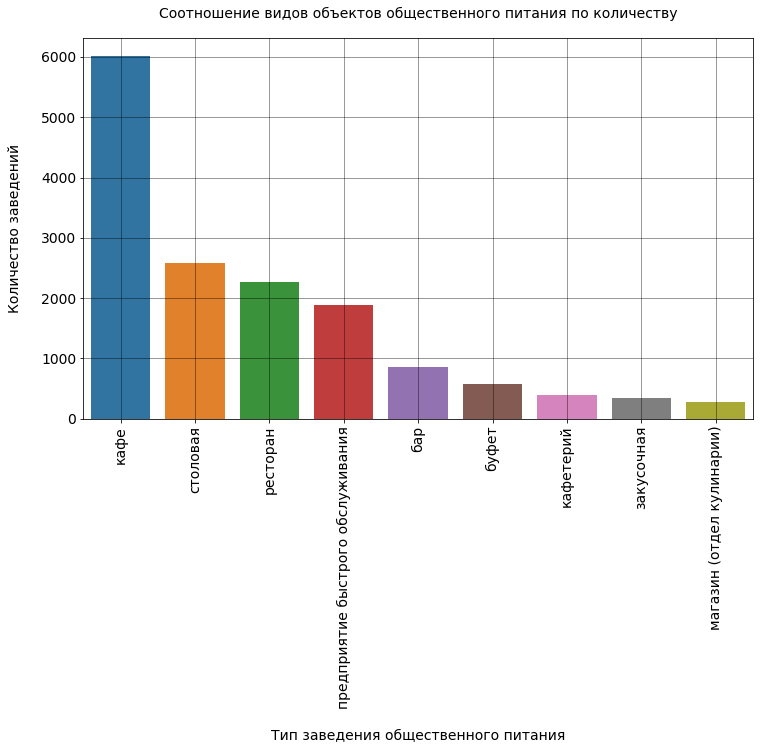

In [11]:
obj_type = df_data.groupby('object_type')['object_type'].count().sort_values(ascending = False)

fig = plt.figure(figsize = (12, 7))
ax  = fig.add_subplot(111) 

plots = sns.barplot(obj_type.index, y = obj_type, ax = ax) 

plots = plot_settungs(ax, 'Соотношение видов объектов общественного питания по количеству', 
                          'Тип заведения общественного питания'                           ,
                          'Количество заведений', deg = 90                                )

**Вывод:** На основе выполненной группировки удалось установить, что больше всего в Москве заведений общественного питания типа - **Кафе**, затем идут **Столовые** и замыкают тройку лидеров **Рестораны**. 

#### Соотношение сетевых и несетевых заведений по количеству.

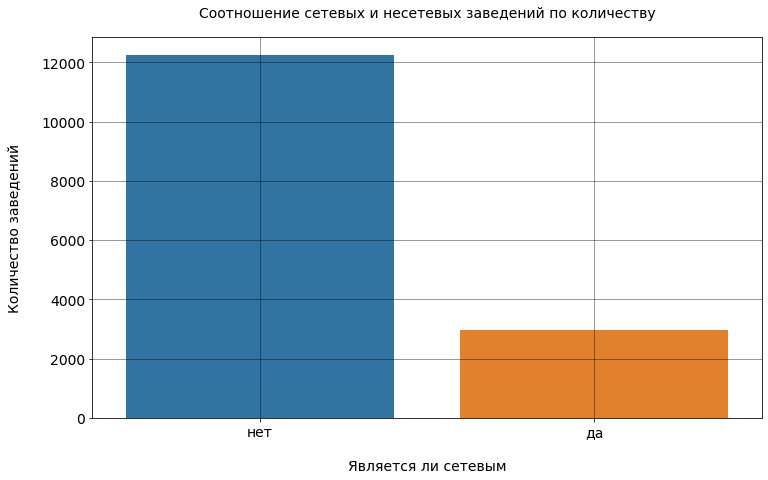

In [12]:
obj_type = df_data.groupby('chain')['chain'].count().sort_values(ascending = False)

fig = plt.figure(figsize = (12, 7))
ax  = fig.add_subplot(111) 

plots = sns.barplot(obj_type.index, y = obj_type, ax = ax) 

plots = plot_settungs(ax, 'Соотношение сетевых и несетевых заведений по количеству', 
                          'Является ли сетевым'                                    ,
                          'Количество заведений', deg = 0                          )

**Вывод:** Большинство объектов общественного питания не являются сетевыми. 

#### Для какого вида объекта общественного питания характерно сетевое распространение?

,type,number,number_chains_positive,share
2,предприятие быстрого обслуживания,1889,783,0.414505
3,магазин (отдел кулинарии),272,78,0.286765
1,ресторан,2270,540,0.237885
5,кафе,6000,1384,0.230667
6,закусочная,347,56,0.161383
4,кафетерий,393,51,0.129771
8,бар,853,37,0.043376
7,буфет,567,11,0.019400
0,столовая,2571,3,0.001167


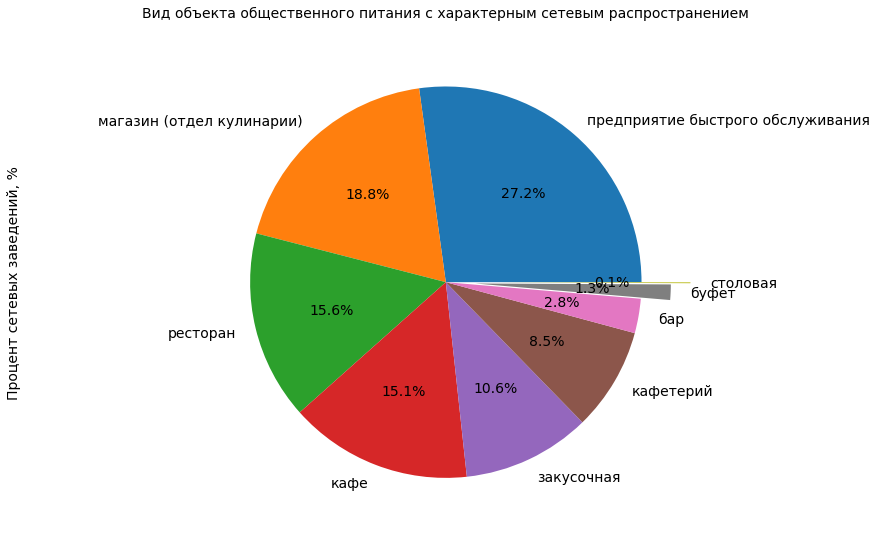

In [34]:
# Загружаем информацию о всех заведениях
total_objects = (df_data
                     .groupby('object_type')
                     .agg({'object_name' : 'count'})
                     .reset_index()
                     .sort_values('object_type', ascending = False)
                ).reset_index(drop = True)

total_objects.columns = ['type', 'number']



# Делаю выборку только для сетевых заведений
chain_yes = (df_data
                 .query('chain == "да"')
                 .groupby('object_type')
                 .agg({'object_name' : 'count'})
                 .reset_index()
                 .sort_values('object_type', ascending = False)
            ).reset_index(drop = True)
chain_yes.columns = ['type', 'number_chains_positive']

# Объединяю все одном датафрейме
df_chain = total_objects.merge(chain_yes, on = ['type'], how = 'outer')

# Get share of chain objects
df_chain['share'] = df_chain['number_chains_positive'] / df_chain['number']
df_chain = df_chain.sort_values('share', ascending = False)

display(df_chain)
# Visualization
explode = (0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.15, 0.25)

#create pie chart
df_chain['share'].plot(kind     = 'pie'    ,
                       figsize  = (10, 9)  ,
                       fontsize = 14       , 
                       autopct  = '%1.1f%%', 
                       explode  = explode  ,
                       labels   = df_chain['type'],
                       shadow   = False    ,
                       startangle = 0     )
# Set labels
plt.title('Вид объекта общественного питания с характерным сетевым распространением', fontsize = 14, pad = 20 )
plt.ylabel('Процент сетевых заведений, %', color = 'black', fontsize = 14, labelpad = 180);

plt.show()

Вывод: Наиболее характерно сетевое распространение для предприятий общественного питания типа **предприятия быстрого обслуживания и отделам кулинарии**. Меньше всего сетевых предприятия в **столовых**, **буфетах** и **барах**.

In [14]:
# Код ревьюера
df_data.groupby('object_type').apply(lambda x : 
    
        pd.Series({
                    'доля_сетевых' : (x['chain'] == 'да').mean()
                })
   )

,доля_сетевых
object_type,
бар,0.043376
буфет,0.019298
закусочная,0.161383
кафе,0.230859
кафетерий,0.129771
магазин (отдел кулинарии),0.286765
предприятие быстрого обслуживания,0.414815
ресторан,0.238347
столовая,0.001165


#### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [38]:
def histogram(df, col, bin, ax):
    df.plot(y = col      , title = col,
            kind = 'hist', bins  = bin,
            grid = True  , ax = ax)


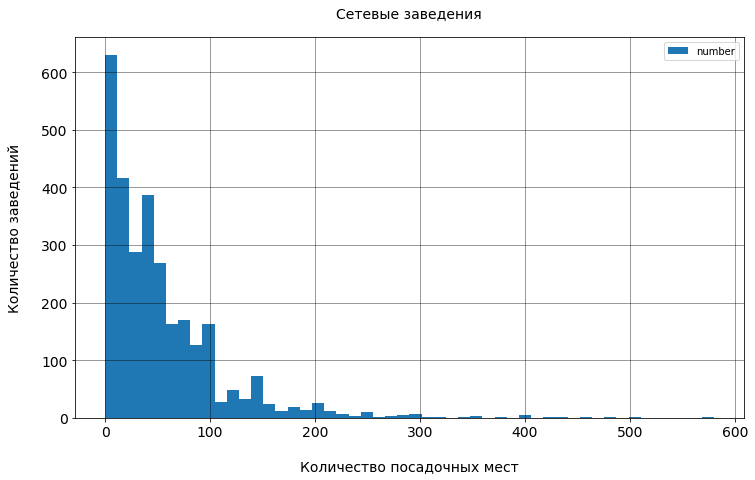

In [16]:
chains = df_data.query('chain == "да"')

fig = plt.figure(figsize = (12, 7))
ax  = fig.add_subplot(111) 

plots = histogram(chains, 'number', 50, ax)   

plots = plot_settungs(ax, 'Сетевые заведения'            , 
                          'Количество посадочных мест'   ,
                          'Количество заведений', deg = 0)
ax.set_yticks(np.arange(0, 651, 50)); 

**Вывод:** В большинстве случаев сетевые объекты общественного питания предпочитают небольшие помещения с малым количество посадочных мест, нежели мало объектов общественного питания, но с большим количество посадочных мест.

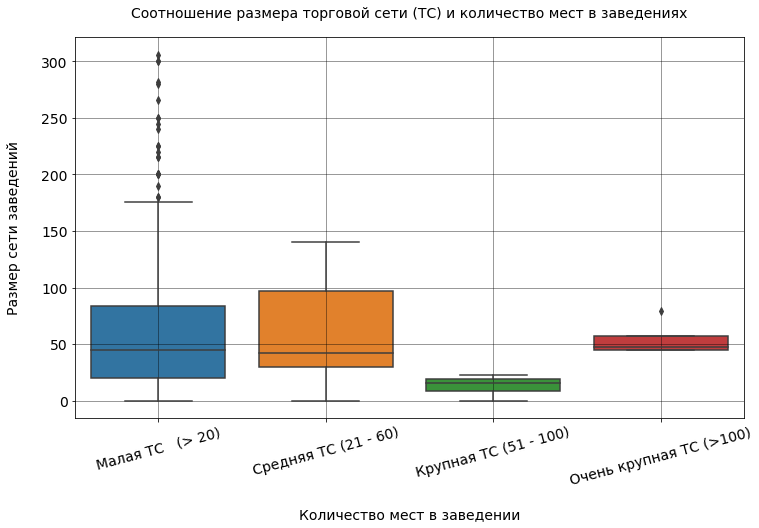

In [17]:
# Загружаем информацию о всех заведениях

total_name = (chains
                     .groupby('object_name')
                     .agg({'number' : ['count', 'median']})
                     .reset_index()
                     
                )#.reset_index(drop = True)
total_name.columns = ['place', 'place_count', 'mean_number']
total_name = total_name.sort_values('place_count', ascending = False)
#display(total_name)

# Create new categories
total_name['size'] = pd.cut(total_name['place_count'], [0, 20, 50, 100, np.inf], 
                                    labels = ['Малая TC   (> 20)'      ,
                                              'Средняя TC (21 - 60)'   ,
                                              'Крупная ТС (51 - 100)'  ,
                                              'Очень крупная ТС (>100)'])   


# Visualization
fig = plt.figure(figsize = (12, 7))
ax  = fig.add_subplot(111) 

plots = sns.boxplot(x = 'size', y = 'mean_number', data = total_name)
plots = plot_settungs(ax, 'Соотношение размера торговой сети (ТС) и количество мест в заведениях', 
                          'Количество мест в заведении'                                          ,
                          'Размер сети заведений', deg = 15                                      )

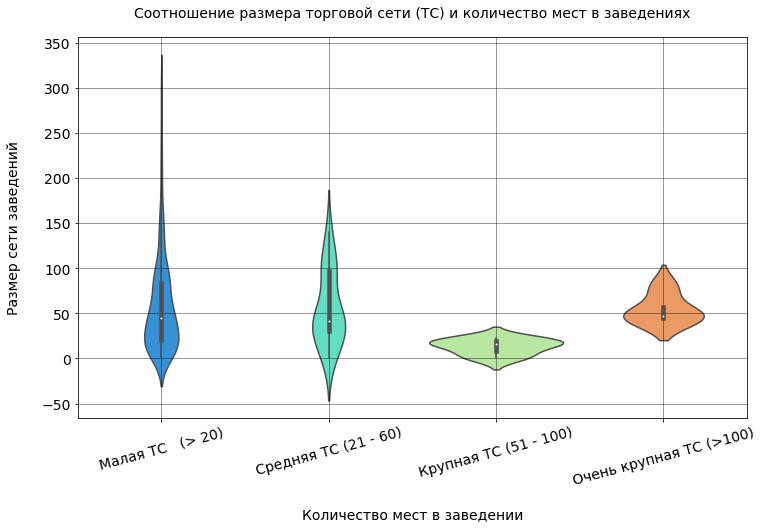

In [18]:
# Visualization
fig = plt.figure(figsize = (12, 7))
ax  = fig.add_subplot(111) 
sns.violinplot(x='size', y='mean_number', data=total_name, palette='rainbow') 
plots = plot_settungs(ax, 'Соотношение размера торговой сети (ТС) и количество мест в заведениях', 
                          'Количество мест в заведении'                                          ,
                          'Размер сети заведений', deg = 15                                      )

**Вывод:** Очень крутные и средние торговые сети предпочитают устанавливать размер заведения на 45 - 50 человек, что хорошо видно на графиках. Крупные сети предпочитают много заведений, но расчитанные на небольшое количетство посетителей 15 - 25. Для малых же торговых сетей свойственнен наибольший разброс по количеству мест, о чем свидетельствуют выбросы. В среднем же число мест не сильно отличается от ощей массы заведений и находится в пределах от 45 до 50.

#### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

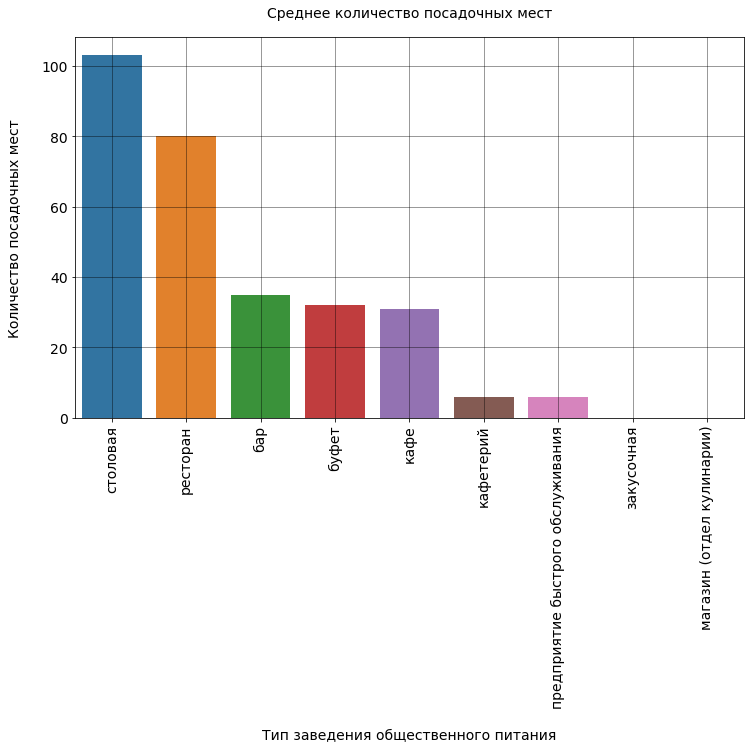

In [19]:
# Загружаем информацию о всех заведениях
mean_objects = (df_data
                     .groupby('object_type')
                     .agg({'number' : 'median'})
                     .reset_index()
                     .sort_values('number', ascending = False)
                ).reset_index(drop = True)
mean_objects

fig = plt.figure(figsize = (12, 7))
ax  = fig.add_subplot(111) 

plots = sns.barplot(mean_objects['object_type'], mean_objects['number'], ax = ax) 

plots = plot_settungs(ax, 'Cреднее количество посадочных мест'   , 
                          'Тип заведения общественного питания'  ,
                          'Количество посадочных мест', deg = 90 )

**Вывод:** Больше всего в среднем посадочных мест в объектах общественного питания типа **столовая**, посадочные места полностью отсутсвуют в объектах общественного питания типа **кулинария** и **закусочная**. 

#### Выделите в отдельный столбец информацию об улице из столбца address 

Сделаю данную процедуру в несколько этапов. На первом этапе добавлю 3 колонки с городом, улицей и дополнительными графами

In [20]:
df_data['city']   = df_data['address'].str.split(r",", expand=True).loc[:,[0]].rename(columns = {0 : 'city'})
df_data['street'] = df_data['address'].str.split(r",", expand=True).loc[:,[1]].rename(columns = {1 : 'street'})
df_data['house']  = df_data['address'].str.split(r",", expand=True).loc[:,[2]].rename(columns = {2 : 'house'})

Проверю на наличие пропусков и удалю пустые значения, если имеются

In [21]:
df_data.info()
df_data = df_data.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15182 entries, 0 to 15181
Data columns (total 9 columns):
id             15182 non-null int64
object_name    15182 non-null object
chain          15182 non-null object
object_type    15182 non-null object
address        15182 non-null object
number         15182 non-null int64
city           15182 non-null object
street         15182 non-null object
house          15162 non-null object
dtypes: int64(2), object(7)
memory usage: 1.0+ MB


В задании говорится, что нам требуется найти ТОП10 улиц для Москвы поэтому все остальные города и поселки Московской области можно убрать.

In [22]:
df_data['city']   = df_data['city'].str.lower()
df_data['street'] = df_data['street'].str.lower()
df_data['house']  = df_data['house'].str.lower()
# Get data only for Moscow
df_moscow = df_data.query('city == "город москва"')
df_moscow.info()
#display(df_moscow)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15111 entries, 0 to 15181
Data columns (total 9 columns):
id             15111 non-null int64
object_name    15111 non-null object
chain          15111 non-null object
object_type    15111 non-null object
address        15111 non-null object
number         15111 non-null int64
city           15111 non-null object
street         15111 non-null object
house          15111 non-null object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB


Отбросили явно лишние города и теперь поправим значения для улиц.

In [23]:
def change_street(row):
    change_in = row['street']
    change_on = row['house'] 
    
    names_list = ['шоссе', 'проезд'  , 'деревня', 'улица',
                  'село' , 'проспект', 'бульвар', 'аллея',
                  'площадь']
    for name in names_list:
        if name in change_on:
            change_in = change_on
            return change_in
        else:
            change_in = change_in
            return change_in
        
# Get correct values in new dataframe    
df_moscow['new_street'] = df_moscow.apply(change_street, axis = 1)
#df_moscow

Большинство проблемных улиц исправлено. Можно удалить лишние столбцы.

In [24]:
df_moscow = df_moscow.drop(['city','street','house'], axis = 1)

**Вывод:** Колонка с улицами успешно создана, при этом есть случаи когда возможно поподания других значений (например: деревня Сидорово или поселок Лесной) в колонку предназначенную для улицы исравлено на корректные значения. Оставшиеся случаи отнесу к погрешностям.

#### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [25]:
# Загружаем информацию о всех заведениях
street_objects = (df_moscow
                     .groupby('new_street')
                     .agg({'object_name' : 'count'})
                     .reset_index()
                     .sort_values('object_name', ascending = False)
                ).reset_index(drop = True)

display(street_objects.head(10))

,new_street,object_name
0,город зеленоград,230
1,проспект мира,196
2,профсоюзная улица,180
3,ленинградский проспект,170
4,пресненская набережная,165
5,варшавское шоссе,162
6,ленинский проспект,147
7,проспект вернадского,126
8,кутузовский проспект,114
9,каширское шоссе,110


Отлично, мне удалось посчитать количество заведений и вывести их ТОП10. Но стоит отметить, что пункт 1 вызывает много вопросов, поэтому исправлю и эту ситуацию, а именно исключю из наших данных такие строчки.

In [26]:
# Correction 2
def change_street2(row):
    change_in = row['new_street'] 
    if ('город' in change_in):
        change_in = 'город'
        return change_in
    else:
        return change_in
    
# Get correct values in new dataframe    
df_moscow['street'] = df_moscow.apply(change_street2, axis = 1)

df_moscow = df_moscow.query('street !="город"').drop(['new_street'], axis = 1)
display(df_moscow)

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
...,...,...,...,...,...,...,...
15177,219759,шоколадница,да,кафе,"город москва, улица вавилова, дом 3",36,улица вавилова
15178,208537,шоколадница,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50,3-й крутицкий переулок
15179,209186,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",20,улица земляной вал
15180,221900,шоколадница,да,кафе,"город москва, поселение московский, киевское ш...",36,киевское шоссе


Теперь данные полностью подготовлены для анализа ТОП улиц.

,street,object_name
0,проспект мира,196
1,профсоюзная улица,180
2,ленинградский проспект,170
3,пресненская набережная,165
4,варшавское шоссе,162
5,ленинский проспект,147
6,проспект вернадского,126
7,кутузовский проспект,114
8,каширское шоссе,110
9,кировоградская улица,107


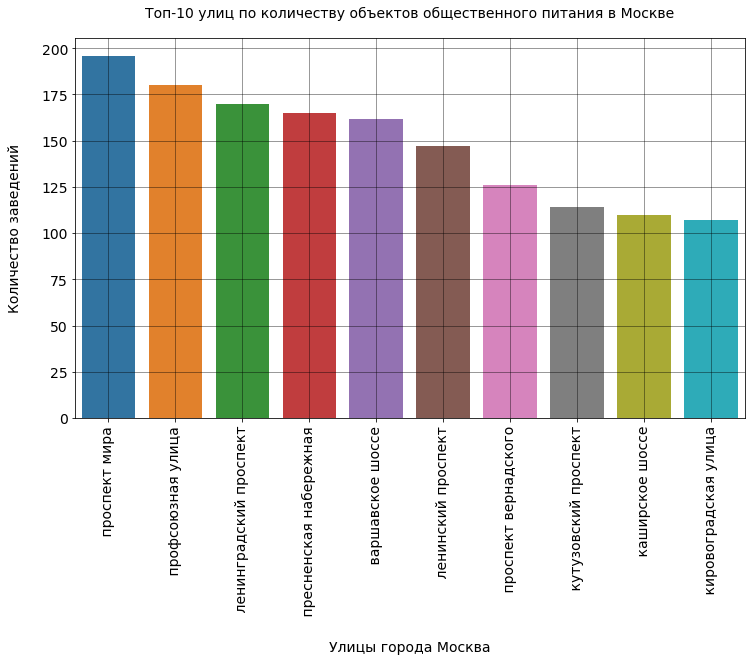

In [27]:
street_objects = (df_moscow
                     .groupby('street')
                     .agg({'object_name' : 'count'})
                     .reset_index()
                     .sort_values('object_name', ascending = False)
                 ).reset_index(drop = True)
# TOP10 streets
top10_streets = street_objects.head(10)
display(top10_streets)

# Visualization
fig = plt.figure(figsize = (12, 7))
ax  = fig.add_subplot(111) 

plots = sns.barplot(top10_streets['street'], top10_streets['object_name'], ax = ax) 

plots = plot_settungs(ax, 'Tоп-10 улиц по количеству объектов общественного питания в Москве'   , 
                          'Улицы города Москва',
                          'Количество заведений', deg = 90 )
plt.show()

Добавлю районы города Москвы на основе внешних данных

In [28]:
moscow_streets['street'] = moscow_streets['street'].str.strip()
top10_streets['street']  = top10_streets['street'].str.strip()

top10_streets = top10_streets.merge(moscow_streets[['street', 'area', 'okrug']], on = ['street'], how = 'left')
top10_streets

,street,object_name,area,okrug
0,проспект мира,196,алексеевский район,свао
1,проспект мира,196,ярославский район,свао
2,проспект мира,196,район марьина роща,свао
3,проспект мира,196,останкинский район,свао
4,проспект мира,196,район ростокино,свао
5,проспект мира,196,район свиблово,свао
6,проспект мира,196,мещанский район,цао
7,профсоюзная улица,180,академический район,юзао
8,профсоюзная улица,180,район черемушки,юзао
9,профсоюзная улица,180,район ясенево,юзао


**Вывод:** Больше всего заведений общественного питания в Москве распологаются на улицах Проспект Мира, Профсоюзная улица и Ленинградский проспект, которые находятся в трех районах Москвы: СВАО, ЮЗАО и САО. Остальные ТОП10 улиц представлены выше.

#### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

,okrug,street
0,цао,185
1,вао,70
2,свао,67
3,сао,55
4,ювао,55
5,зао,41
6,юао,29
7,сзао,27
8,юзао,27
9,зеленоград,1


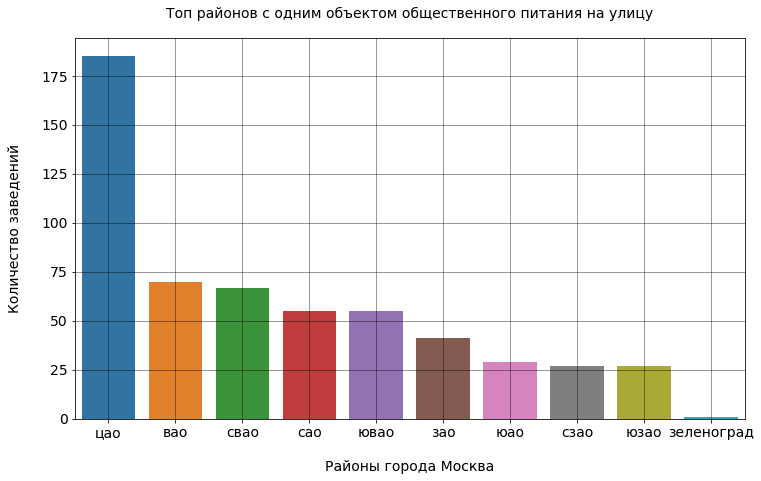

In [29]:
one_object = street_objects.query('object_name == 1').reset_index(drop = True).drop(['object_name'], axis = 1)

# Подготовим данные к объединению
one_object['street']     = one_object['street'].str.strip()
moscow_streets['street'] = moscow_streets['street'].str.strip()

# Выполню объединение
one_object = one_object.merge(moscow_streets[['street', 'area', 'okrug']], on = ['street'], how = 'left')

one_object = (one_object
                    .groupby('okrug')
                    .agg({'street' : 'count'})               
                    .reset_index()
                    .sort_values('street', ascending = False)
            ).reset_index(drop = True)

display(one_object)

# Visualization
fig = plt.figure(figsize = (12, 7))
ax  = fig.add_subplot(111) 

plots = sns.barplot(one_object['okrug'], one_object['street'], ax = ax) 

plots = plot_settungs(ax, 'Tоп районов с одним объектом общественного питания на улицу', 
                          'Районы города Москва',
                          'Количество заведений', deg = 0 )
plt.show()

**Вывод:** Больше всего улиц с одним объектом общественного питания представленно в трех районах Москвы: ЦАО, ВАО, СВАО. Скорее всего это связано с тем, что в этих района очень много объектов общественного питания расположенно на центральных улицах, а мелкие дворовые улочки интересуют очень немногих.

#### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

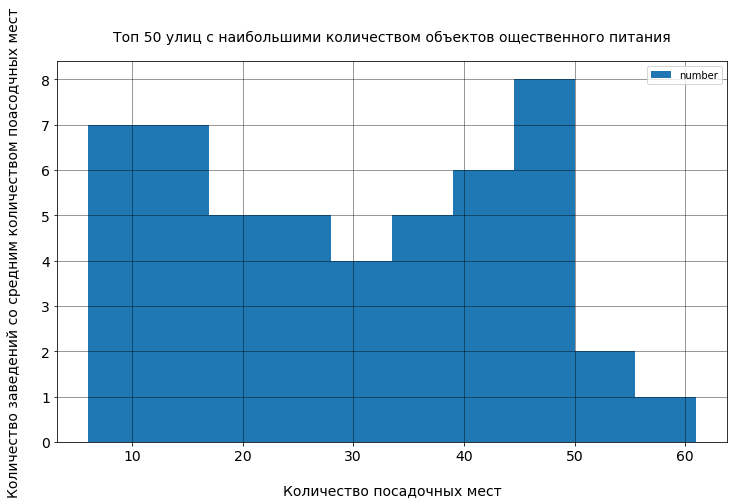

In [30]:
top_numbers = (df_moscow
                     .groupby('street')
                     .agg({'object_name' : 'count',
                           'number'      : 'median' })
                     .reset_index()
                     .sort_values('object_name', ascending = False)
                 ).reset_index(drop = True)
# TOP10 streets
top50_numbers = top_numbers.head(50)
#display(top40_numbers)

# Visualization
fig = plt.figure(figsize = (12, 7))
ax  = fig.add_subplot(111) 

plots = histogram(top50_numbers, 'number', 10, ax)    

plots = plot_settungs(ax, 'Топ 50 улиц с наибольшими количеством объектов ощественного питания', 
                          'Количество посадочных мест'   ,
                          'Количество заведений со средним количеством поасодчных мест', deg = 0)
#ax.set_yticks(np.arange(0, 101, 10)) 


**Вывод:** На ТОП50 улиц с наибольшим количество объектов общественного питания в среднем количество посадочных мест находится в диапазоне от 45 до 50. Также встречаются особенно интересные случаи, когда мест от 5 - 15, что наверно относится к различным винотекам или заведениям ориентированным на более частных клиентов.

### Презентация

Презентация: https://drive.google.com/file/d/1zw9X8UqvbUZ-JfEMvSduedzIZpFIk_8U/view?usp=sharing

## Вывод по проекту

1. В Москве среди заведений общественного питания большего всего кафе (6099), столовых (2578), ресторанов (2285) и предприятий быстрого обслуживания (1923), для которых характерен сетевой тип распространения (28%).

2. Больше всего объектов общественного питания на одной улице в Москве представлено в трех районах: СВАО, ЮЗАО и САО.

3. В среднем количество посадочных мест в заведениях общественного питания составляет 40 – 50 посадочных мест.

4. Наименьшее количество заведений общественного питания на одной улице (без учета центральных) представлено в ЦАО, ВАО, СВАО 


**Рекомендации:**

1. Открывать заведение лучше всего в одном из 2-х районов Москвы: САО или ЮЗАО  
 
2. Количество мест для посетителей запланировать от 30 до 50.

3. По возможности открыть заведение не на центральной улице, т.к. арендная плата ниже, а посетители районов САО и ЮЗАО уже привыкли, что заведения есть где-то еще, кроме центральных улиц.

4. Кафе и ресторанов в Москве уже с избытком, а вот интересного бара с роботами, закусками и хорошей музыкой, точно нет.
